# Harmonize ONT reads with array reference

1. Converting unaligned CRAM to FASTQ for Minimap2 aligment:

    ```bash
    samtools bam2fq -@ 32 -T 1 --reference ./ref/hg38.fna cram/uf_hembank_${ID}.pass.cram | \
    minimap2 -y -t 32 -ax lr:hq ref/hg38.fna - > sam/uf_hembank_${ID}.sam
    ```

2. Converting SAM to BAM, sorting, and indexing:

    ```bash
    samtools view -@ 32 -bS sam/uf_hembank_${ID}.sam | \
    samtools sort -@ 32 - --write-index -o bam/uf_hembank_${ID}.bam -O BAM --reference ref/hg38.fna
    ```

3. Creating a BedMethyl file with Modkit
    
    ```bash
    modkit pileup bam/uf_hembank_${ID}.bam bed/uf_hembank_${ID}.bed.gz -t 32 --combine-strands --cpg --ignore h --ref ref/hg38.fna
    ```

## Where data at?

In [1]:
import pandas as pd

mount = '/mnt/d/'

reference_path = mount + 'genome_references/Illumina_methylation_arrays/EPIC.hg38.manifest.tsv.gz'
output_path = mount + 'MethylScore_v2/Processed_Data/'

sample_name = 'uf_hembank_1829'

## Create BED6 file to harmonize probes from EPIC array with nanopore

In [2]:
# # read df_discovery and df_validation
# df_discovery = pd.read_pickle(mount+'MethylScore_v2/Intermediate_Files/'+'3308samples_333059cpgs_withbatchcorrection_bvalues.pkl').sort_index().iloc[:,1:]

# array_reference = pd.read_csv("/mnt/c/Users/fmarc/OneDrive/Desktop/nanopore_processed/ref/EPIC.anno.GRCh38.tsv.gz", sep='\t', compression='gzip',
#                               usecols=['chrm','start','end','orientation', 'probeID']
#                               ).set_index('probeID').sort_index()

# pacmap_reference = array_reference.loc[df_discovery.columns].reset_index()

# # change values in `orientation` column to match the orientation of the probes in the discovery dataset
# pacmap_reference['orientation'] = pacmap_reference['orientation'].map({'down': '-', 'up': '+'})
# pacmap_reference['score'] = 0

# # Rename `IlmnID` to `name`
# pacmap_reference = pacmap_reference.rename(columns={'IlmnID': 'name', 'orientation': 'strand'})

# # Order columns
# pacmap_reference = pacmap_reference[['chrm', 'start', 'end', 'name', 'score', 'strand', ]]

# # Sort by `chrm` and `start`
# pacmap_reference = pacmap_reference.sort_values(by=['chrm', 'start'])

# pacmap_reference.to_csv('/mnt/c/Users/fmarc/OneDrive/Desktop/nanopore_processed/ref/pacmap_reference.bed', sep='\t', index=False, header=False)

pacmap_reference = pd.read_csv('/mnt/c/Users/fmarc/OneDrive/Desktop/nanopore_processed/ref/pacmap_reference.bed', sep='\t', header=None, names=['chrm', 'start', 'end', 'name', 'score', 'strand'])
pacmap_reference

,chrm,start,end,name,score,strand
0,chr1,69590,69592,cg21870274,0,+
1,chr1,864702,864704,cg08258224,0,-
2,chr1,870160,870162,cg16619049,0,-
3,chr1,877158,877160,cg18147296,0,-
4,chr1,898802,898804,cg13938959,0,+
...,...,...,...,...,...,...
333053,chr9,138119084,138119086,cg00378292,0,+
333054,chr9,138120221,138120223,cg07982825,0,-
333055,chr9,138122338,138122340,cg14491707,0,+
333056,chr9,138122548,138122550,cg13811936,0,-


## Load modkit processed file

In [3]:

# Read the input data, skipping the first row if it's a header or irrelevant
df = pd.read_csv('/mnt/c/Users/fmarc/OneDrive/Desktop/nanopore_processed/bed/uf_hembank_1829.bed', sep='\s+',
                 names=["chrom", "start_position","end_position","modified base code","score",
                        'strand' ,"start position","end position", "color", "Nvalid_cov",
                        "fraction modified", "Nmod", "Ncanonical", "Nother_mod", "Ndelete",
                        "Nfail", "Ndiff", "Nnocall"])

df

,chrom,start_position,end_position,modified base code,score,strand,start position,end position,color,Nvalid_cov,fraction modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall
0,chr1,10468,10469,m,9,.,10468,10469,"255,0,0",9,66.67,6,3,0,1,1,0,0
1,chr1,10470,10471,m,10,.,10470,10471,"255,0,0",10,90.00,9,1,0,1,0,0,0
2,chr1,10483,10484,m,8,.,10483,10484,"255,0,0",8,100.00,8,0,0,3,0,0,0
3,chr1,10488,10489,m,10,.,10488,10489,"255,0,0",10,90.00,9,1,0,0,1,0,0
4,chr1,10492,10493,m,11,.,10492,10493,"255,0,0",11,90.91,10,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29147207,chrUn_GL000218v1,160573,160574,m,34,.,160573,160574,"255,0,0",34,23.53,8,26,0,0,1,1,0
29147208,chrUn_GL000218v1,160611,160612,m,34,.,160611,160612,"255,0,0",34,58.82,20,14,0,0,1,0,0
29147209,chrUn_GL000218v1,160669,160670,m,27,.,160669,160670,"255,0,0",27,22.22,6,21,0,0,2,5,0
29147210,chrUn_GL000218v1,160790,160791,m,26,.,160790,160791,"255,0,0",26,34.62,9,17,0,0,1,1,0


## Index genomic coordinates for both files

In [1]:

# Create 'coordinate' column for merging
df['coordinate'] = df['chrom'].astype(str) + ':' + df['start_position'].astype(str)

df_filtered = df[df['modified base code'].isin(['m'])].set_index('coordinate')

pacmap_reference['coordinate'] = pacmap_reference['chrm'].astype(str) + ':' + pacmap_reference['start'].astype(str)
pacmap_reference = pacmap_reference.set_index('coordinate')

# Join with reference data on 'coordinate'
# df_merged = df_filtered.join(pacmap_reference[['name']], how='inner')

df_merged = pacmap_reference[['name']].join(df_filtered, how='inner')

df_merged

NameError: name 'df' is not defined

In [7]:

# Calculate the fraction modified and prepare the final DataFrame
df_merged.loc[:, sample_name] = (df_merged['fraction modified'] / 100).round(3)

df_processed = df_merged[['name', sample_name]].set_index('name').T

df_processed

## Apply PaCMAP model

In [84]:
import pacmap

def apply_pacmap_model_to_new_data(df, components):

    # Load reducer
    reducer = pacmap.load(f'../models/pacmap_{components}d_model_al_atlas')

    # Project the high dimensional dataset into existing embedding space and return the embedding.
    embedding = reducer.transform(df.to_numpy(dtype='float16'))

    # Create column names
    cols = ['PaCMAP '+ str(i+1) + f' of {components}' for i in range(components)]

    # Turn embedding into dataframe
    df_embedding = pd.DataFrame(embedding, columns=cols, index=df.index)

    return df_embedding

df_embedding_2d = apply_pacmap_model_to_new_data(df_final, 2)
df_embedding_5d = apply_pacmap_model_to_new_data(df_final, 5)

df_embedding_2d.to_pickle(output_path + sample_name + '_pacmap_2d.pkl')
df_embedding_5d.to_pickle(output_path + sample_name + '_pacmap_5d.pkl')

## Apply supervised models

In [85]:
import joblib

# Load models
lgbm_px_model = joblib.load('../models/lgbm_px_model.pkl')
lgbm_dx_model = joblib.load('../models/lgbm_dx_model.pkl')

# load `df_embedding_5d` from the previous step
df_embedding_5d = pd.read_pickle(output_path + sample_name + '_pacmap_5d.pkl')

def save_predictions(df, classifier, model_name):

    # ignore sklearn warnings
    import warnings
    warnings.filterwarnings('ignore')

    # Select necessary columns
    df_features = df.copy()

    # Predict using the selected columns
    predictions = classifier.predict(df_features)

    # Predict probabilities using the selected columns
    probabilities = classifier.predict_proba(df_features)

    # Convert predictions to a Series with the same index as df_features
    predictions_series = pd.Series(predictions, index=df_features.index, name=model_name)

    # Convert probabilities to a DataFrame with the same index as df_features and the same columns as the classes
    probabilities_df = pd.DataFrame(probabilities, index=df_features.index, columns=classifier.classes_).round(3)

    # Add " - predict_proba" to the column names
    probabilities_df.columns ='P(' + probabilities_df.columns + ')'

    # Transform classes of the predictions into integers based on unique values in the classes
    probabilities_df[model_name + '_int'] = predictions_series.map({c: i for i, c in enumerate(classifier.classes_)})

    # Join predictions with the original DataFrame (already indexed)
    df_joined = predictions_series.to_frame().join(probabilities_df)

    return df_joined

# Execution
df_pred_px = save_predictions(df=df_embedding_5d, classifier=lgbm_px_model, model_name='AML Epigenomic Risk')
df_pred_dx = save_predictions(df=df_embedding_5d, classifier=lgbm_dx_model, model_name='AL Epigenomic Phenotype')

# Map the classes to more desirable labels (low and high risk)
df_pred_px['AML Epigenomic Risk'] = df_pred_px['AML Epigenomic Risk'].map({'Alive': 'Low', 'Dead': 'High'})
df_pred_px = df_pred_px.rename(columns={'P(Alive)': 'AML Epigenomic Risk P(Low Risk)', 'P(Dead)': 'AML Epigenomic Risk P(High Risk)'})

# Join predictions with clinical data
df_combined = df_embedding_2d.join(df_embedding_5d).join(df_pred_px).join(df_pred_dx)

df_combined[['AML Epigenomic Risk', 'AML Epigenomic Risk P(High Risk)', 'AL Epigenomic Phenotype', f'P({df_combined["AL Epigenomic Phenotype"].item()})']]

,AML Epigenomic Risk,AML Epigenomic Risk P(High Risk),AL Epigenomic Phenotype,P(Otherwise-Normal Control)
uf_hembank_1831,Low,0.377,Otherwise-Normal Control,0.986


## EWASCox-Lasso

In [86]:
import math
import sys
sys.path.append('../')
from source.cox_lasso import *

raw_coefs = pd.read_csv(output_path + 'multivariate_cox_lasso/ewas_cog_os_raw_coefs_newrisk.csv', index_col=0)

mean_coefs = set_cutoff(coefs=raw_coefs,threshold=0.99)

df_validation = df_processed[mean_coefs.index]

df_validation_transformed = df_validation.replace(1, 0.999).replace(0, 0.001)

def beta2m(val):
    '''Transfrom beta-values into m-values'''
    return math.log2(val/(1-val))

x_test_m = df_validation_transformed.apply(np.vectorize(beta2m))

def standardize_data(df, reference_df):
    """Standardize data using mean and standard deviation of reference dataset"""

    # Keep only columns that are in both datasets
    reference_df = reference_df.loc[:, df.columns]

    # Standardize data
    df_z = (df - reference_df.mean()) / reference_df.std()

    return df_z

# Read top CpGs selected from previous code file (univariate cox-ph EWAS)
ewas_top_cpgs = pd.read_csv(output_path+'ewas_dmr/ewas_top_cpgs_os.csv', index_col=0)

# Standardize data
x_test_m_z = standardize_data(df= x_test_m, reference_df= ewas_top_cpgs)

score_name = 'EWASCox_OS_48CpGs'

df_test, threshold = generate_coxph_score(coef_mean=mean_coefs,
                                        x=x_test_m_z,
                                        df=df_validation_transformed,
                                        score_name=score_name,
                                        train_test=0.4934,
                                        rpart_outcome='os.time')

df_validation_transformed[['EWASCox_OS_48CpGs','EWASCox_OS_48CpGs Categorical']]

Continuous score cut at the value of 0.4934


name,EWASCox_OS_48CpGs,EWASCox_OS_48CpGs Categorical
uf_hembank_1831,-2.45473,Low


## Save results

In [87]:
df_nanopore = df_combined.join(df_validation_transformed[['EWASCox_OS_48CpGs','EWASCox_OS_48CpGs Categorical']])

df_nanopore['Train-Test'] = 'Long-read Nanopore sequencing'
df_nanopore['Clinical Trial'] = 'UF Hem Bank'
df_nanopore['Patient_ID'] = sample_name
df_nanopore['Hematopoietic Entity'] = np.nan
df_nanopore['WHO 2022 Diagnosis'] =  np.nan
df_nanopore['Vital Status'] = np.nan
df_nanopore['Risk Group AAML1831'] = np.nan

df_nanopore.to_excel(output_path + sample_name + '_processed.xlsx')

# print save message
print(f'Processed data for {sample_name} saved as {output_path + sample_name + "_processed.xlsx"}')

Processed data for uf_hembank_1831 saved as /mnt/d/MethylScore_v2/Processed_Data/uf_hembank_1831_processed.xlsx


In [88]:
df_nanopore

,PaCMAP 1 of 2,PaCMAP 2 of 2,PaCMAP 1 of 5,PaCMAP 2 of 5,PaCMAP 3 of 5,PaCMAP 4 of 5,PaCMAP 5 of 5,AML Epigenomic Risk,AML Epigenomic Risk P(Low Risk),AML Epigenomic Risk P(High Risk),...,AL Epigenomic Phenotype_int,EWASCox_OS_48CpGs,EWASCox_OS_48CpGs Categorical,Train-Test,Clinical Trial,Patient_ID,Hematopoietic Entity,WHO 2022 Diagnosis,Vital Status,Risk Group AAML1831
uf_hembank_1831,-22.051228,-36.194042,-8.777368,-10.377757,24.501038,-25.286396,-7.418868,Low,0.623,0.377,...,23,-2.45473,Low,Long-read Nanopore sequencing,UF Hem Bank,uf_hembank_1831,NaN,NaN,NaN,NaN


## Plots results

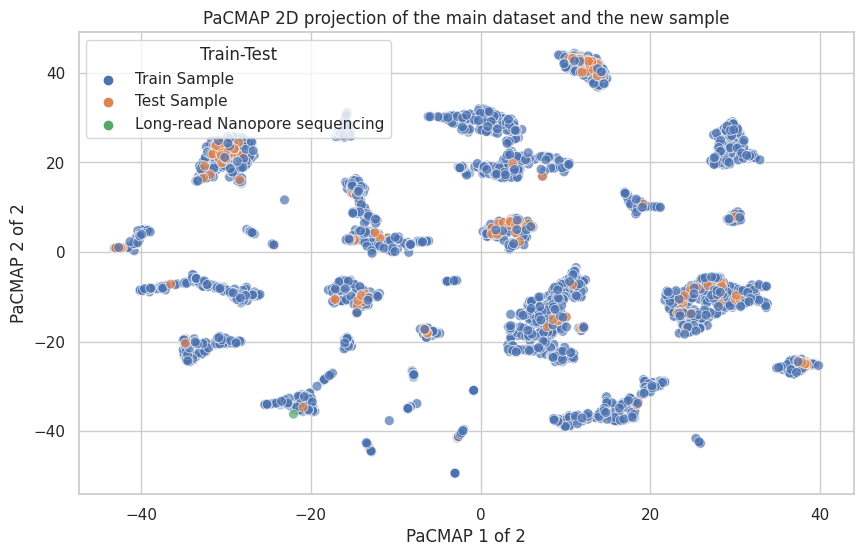

In [89]:
file_path = '../data/al_atlas_main_results.xlsx'
atlas_main = pd.read_excel(file_path, index_col=0).sort_index()          

df2 = pd.concat([atlas_main, df_nanopore])

# plot a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PaCMAP 1 of 2", y="PaCMAP 2 of 2", hue="Train-Test", data=df2, s=50, alpha=0.7)
plt.title('PaCMAP 2D projection of the main dataset and the new sample')
plt.show()

## Watermark

In [88]:
%load_ext watermark

In [90]:
# watermark with all libraries used in this notebook
%watermark -v -p numpy,pandas,pacmap,sklearn,lightgbm -a Francisco_Marchi@Lamba_Lab_UF -d -m

Author: Francisco_Marchi@Lamba_Lab_UF

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.12.3

numpy   : 1.24.4
pandas  : 2.0.3
pacmap  : 0.7.0
sklearn : 1.2.2
lightgbm: 3.3.5

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.15.133.1-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 6
Architecture: 64bit



```{note}
Please only use the following versions:
`python`: 3.8.16
`pacmap`: 0.7.0
`lightgbm`: 3.3.5
`scikit-learn`: 1.2.2
```